In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '/Users/isabellelee/Desktop/data_science/capstone/src')

In [2]:
lat_lon = pd.read_csv('../data/lat_log.csv')

In [3]:
transformed = pd.read_pickle('../data/transformed_20.pkl')

In [4]:
transformed.shape

(1879, 6)

In [5]:
lat_lon.shape

(2252, 5)

In [15]:
lat_lon = lat_lon.drop_duplicates()

In [18]:
df_transformed= pd.DataFrame(transformed.topicDistribution)
df_transformed['attraction'] = transformed.attractions

In [19]:
df_transformed[:5]

,topicDistribution,attraction
0,"[0.00663724844079, 0.00265223685009, 0.0020658...",Sydney_Harbour-Sydney_New_South_Wales
1,"[0.0116247603055, 0.000738219390953, 0.0013014...",Australian_War_Memorial-Canberra_Australian_Ca...
2,"[0.000906048232671, 0.00764642656688, 0.002745...",Bondi_to_Coogee_Beach_Coastal_Walk-Sydney_New_...
3,"[0.00343066358462, 0.00205857043043, 0.0014377...",Sydney_Opera_House-Sydney_New_South_Wales
4,"[0.00214805595569, 0.000721378426068, 0.001531...",Shrine_of_Remembrance-Melbourne_Victoria


In [25]:
df_location = pd.DataFrame(lat_lon.attraction) 
df_location['latitude'] = lat_lon.latitude
df_location['longitude'] = lat_lon.longitude

In [26]:
df_location[:5]

,attraction,latitude,longitude
0,Sydney_Harbour-Sydney_New_South_Wales,-33.868820,151.209295
1,Australian_War_Memorial-Canberra_Australian_Ca...,-35.279444,149.149680
2,Bondi_to_Coogee_Beach_Coastal_Walk-Sydney_New_...,-33.922393,151.255973
3,Sydney_Opera_House-Sydney_New_South_Wales,-33.856536,151.214996
4,Shrine_of_Remembrance-Melbourne_Victoria,-37.842557,144.977767


In [30]:
df_total = pd.merge(df_transformed, df_location, on='attraction')

In [47]:
df_total[:5]

,topicDistribution,attraction,latitude,longitude
0,"[0.00663724844079, 0.00265223685009, 0.0020658...",Sydney_Harbour-Sydney_New_South_Wales,-33.868820,151.209295
1,"[0.0116247603055, 0.000738219390953, 0.0013014...",Australian_War_Memorial-Canberra_Australian_Ca...,-35.279444,149.149680
2,"[0.000906048232671, 0.00764642656688, 0.002745...",Bondi_to_Coogee_Beach_Coastal_Walk-Sydney_New_...,-33.922393,151.255973
3,"[0.00343066358462, 0.00205857043043, 0.0014377...",Sydney_Opera_House-Sydney_New_South_Wales,-33.856536,151.214996
4,"[0.00214805595569, 0.000721378426068, 0.001531...",Shrine_of_Remembrance-Melbourne_Victoria,-37.842557,144.977767


### Say you picked topic 4, 14, 9.  Then how do we know which locations give high composite lda scores for these?

In [89]:
def lda_scores(x, lst_topics=[4,14,9]):
    total_score = []
    for i in lst_topics:
        total_score.append(x[i])
    total_score = np.array(total_score)
    return total_score.sum()/len(total_score)

In [90]:
df_total['lda_score'] = df_total.topicDistribution.apply(lda_scores)

In [91]:
df_total.sort_values('lda_score', ascending=False)[:10]

,topicDistribution,attraction,latitude,longitude,lda_score
11,"[0.000305087650327, 0.000299934812593, 0.00072...",Kata_Tjuta_The_Olgas-Uluru_Kata_Tjuta_National...,-25.343780,131.034651,0.330649
85,"[0.00126897571654, 0.000449215679553, 0.000550...",Beng_Mealea-Siem_Reap_Province,13.412469,103.866986,0.329542
87,"[0.000299565261297, 0.000269936705604, 0.00043...",Cambodia_Landmine_Museum-Siem_Reap_Siem_Reap_P...,13.539563,103.945851,0.329045
80,"[0.000722154950546, 0.000541443306928, 0.00059...",Bayon_Temple-Siem_Reap_Siem_Reap_Province,13.440830,103.859038,0.329028
98,"[0.000586615506657, 0.0003729713443, 0.0004382...",Banteay_Srei-Siem_Reap_Siem_Reap_Province,13.367097,103.844813,0.328431
774,"[0.000781568519081, 0.000510460985113, 0.00098...",Iguazu_Falls-Foz_do_Iguacu_State_of_Parana,-25.613348,-54.479599,0.327763
90,"[0.000467936406192, 0.000564101014927, 0.00058...",Battambang_Bat_Caves-Battambang_Battambang_Pro...,13.095730,103.202205,0.327392
167,"[0.00166246629644, 0.000805013353267, 0.000742...",Jatiluwih_Green_Land-Tabanan_Bali,-8.361985,115.140133,0.327057
82,"[0.00353816991767, 0.000482978998472, 0.002355...",Angkor_Thom-Siem_Reap_Siem_Reap_Province,13.378374,103.848589,0.326234
88,"[0.00167110012356, 0.000667465723207, 0.000536...",Angkor_National_Museum-Siem_Reap_Siem_Reap_Pro...,13.366573,103.860283,0.325443


looks like a good recommendation!  The starting point should be the one that gives the best distribution

In [92]:
df_attr = pd.read_csv('../data/attractions.csv')

In [105]:
df_attr = df_attr[['country', 'attraction']]

In [96]:
df_countries = pd.read_csv('../data/world.csv')

In [103]:
df_countries = df_countries[['continent', 'country']]

In [108]:
df_world = pd.merge(df_countries, df_attr, on='country')

In [110]:
df_world = df_world.drop_duplicates()

In [114]:
world = pd.merge(df_world, df_total, on='attraction')

In [121]:
world = world.drop('lda_score', 1)

In [122]:
world.to_pickle('../data/total_everything_world.pkl')

In [5]:
world = pd.read_pickle('../data/total_everything_world.pkl')
world[:5]

,continent,country,attraction,topicDistribution,latitude,longitude
0,oceania,Australia,Sydney_Harbour-Sydney_New_South_Wales,"[0.00663724844079, 0.00265223685009, 0.0020658...",-33.868820,151.209295
1,oceania,Australia,Australian_War_Memorial-Canberra_Australian_Ca...,"[0.0116247603055, 0.000738219390953, 0.0013014...",-35.279444,149.149680
2,oceania,Australia,Bondi_to_Coogee_Beach_Coastal_Walk-Sydney_New_...,"[0.000906048232671, 0.00764642656688, 0.002745...",-33.922393,151.255973
3,oceania,Australia,Sydney_Opera_House-Sydney_New_South_Wales,"[0.00343066358462, 0.00205857043043, 0.0014377...",-33.856536,151.214996
4,oceania,Australia,Shrine_of_Remembrance-Melbourne_Victoria,"[0.00214805595569, 0.000721378426068, 0.001531...",-37.842557,144.977767


In [3]:
from recommend import lda_scores, first_recommendation, distance_btw_recommendations

In [25]:
from geopy.distance import vincenty

In [135]:
vincenty((-33.868820,151.209295),(-37.842557,144.977767)).km

714.7047141786433

In [136]:
max_vincenty = 20036

In [4]:
distance_btw_recommendations(-33.868820,151.209295,-37.842557,144.977767)

0.03567102785878635

In [150]:
c = np.array(world.continent.unique())

In [156]:
c

array(['oceania', 'asia', 'africa', 'sa', 'na', 'europe'], dtype=object)

In [4]:
oceania = world[world.continent == 'oceania']

In [5]:
asia = world[world.continent == 'asia']

In [6]:
na = world[world.continent == 'na']

In [7]:
sa = world[world.continent == 'sa']

In [8]:
africa = world[world.continent == 'africa']

In [9]:
europe = world[world.continent == 'europe']

In [101]:
sample_oceania = oceania.sample(n=2)
sample_asia = asia.sample(n=2)
sample_africa = africa.sample(n=2)
sample_na = na.sample(n=1)
sample_sa = sa.sample(n=1)
sample_europe = europe.sample(n=3)


In [102]:
df_sampled = sample_oceania
df_sampled = df_sampled.append(sample_asia).append(sample_africa).append(sample_na).append(sample_sa).append(sample_europe)
df_sampled = df_sampled.sort_values('longitude')

In [11]:
(sample_oceania.latitude.values[0], sample_oceania.longitude.values[0])

(-6.3149930000000003, 143.95554999999999)

In [12]:
world['lda_score'] = world.topicDistribution.apply(lambda x: lda_scores(x,lst_topics= [0,13,7]))

In [14]:
rec_0 = first_recommendation(world)

In [35]:
rec_0

,continent,country,attraction,topicDistribution,latitude,longitude,lda_score
1450,europe,France,Ile_Saint_Louis-Paris_Ile_de_France,"[0.00279284681149, 0.00162163823711, 0.0011288...",48.851939,2.357035,0.32558


In [16]:
def return_coords(x):
    return (x.latitude.values[0], x.longitude.values[0])

In [54]:
y = return_coords(rec_0)

In [37]:
sample_oceania

,continent,country,attraction,topicDistribution,latitude,longitude
71,oceania,Papua_New_Guinea,Kokoda_Track-Papua_New_Guinea,"[0.000941887269645, 0.000985838830485, 0.03127...",-6.314993,143.95555


In [53]:
x = return_coords(sample_oceania)

In [39]:
x

(-6.3149930000000003, 143.95554999999999)

In [40]:
y

(48.851938700000005, 2.3570352000000003)

In [23]:
def distance_btw_recommendations(x,y):
    max_vincenty = 20036
    return vincenty(x,y).km/max_vincenty

In [41]:
distance_btw_recommendations(x,y)

0.7025256190178214

In [27]:
# imports!
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geocoder

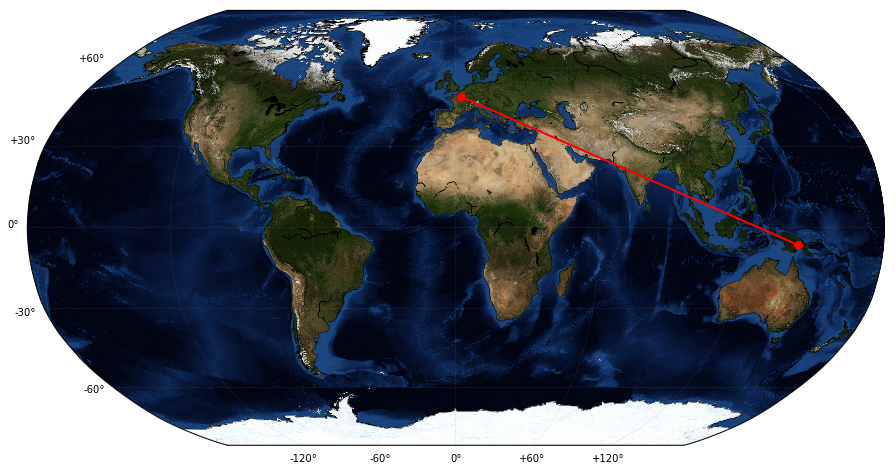

In [64]:
fig = plt.figure(figsize=(18,8))
map_ = Basemap(projection='robin',resolution='c',lat_0=0,lon_0=0)
map_.bluemarble()
# Add some more info to the map
cstl = map_.drawcoastlines(linewidth=.5)
meri = map_.drawmeridians(np.arange(0,360,60), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey' ) 
para = map_.drawparallels(np.arange(-90,90,30), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey')
boun = map_.drawmapboundary(linewidth=0.5, color='grey')

#plot points
x,y = map_([rec_0.longitude,sample_oceania.longitude], [rec_0.latitude,sample_oceania.latitude])
map_.plot(x,y, 'ro', markersize=8)
map_.plot(x,y,linewidth=2,color='r')
plt.show()

In [62]:
x

[17181372.92363374, 30543778.065017648]

In [66]:
l = [rec_0, sample_oceania]

In [68]:
l[1]

,continent,country,attraction,topicDistribution,latitude,longitude
71,oceania,Papua_New_Guinea,Kokoda_Track-Papua_New_Guinea,"[0.000941887269645, 0.000985838830485, 0.03127...",-6.314993,143.95555


In [19]:
import sys
sys.path.insert(0, '/Users/isabellelee/Desktop/data_science/capstone/src')
import matplotlib.pyplot as plt
from plot_rec import list_locations, plot_map, sample_rand

In [20]:
world = pd.read_pickle('../data/total_everything_world.pkl')
world[:5]

,continent,country,attraction,topicDistribution,latitude,longitude
0,oceania,Australia,Sydney_Harbour-Sydney_New_South_Wales,"[0.00663724844079, 0.00265223685009, 0.0020658...",-33.868820,151.209295
1,oceania,Australia,Australian_War_Memorial-Canberra_Australian_Ca...,"[0.0116247603055, 0.000738219390953, 0.0013014...",-35.279444,149.149680
2,oceania,Australia,Bondi_to_Coogee_Beach_Coastal_Walk-Sydney_New_...,"[0.000906048232671, 0.00764642656688, 0.002745...",-33.922393,151.255973
3,oceania,Australia,Sydney_Opera_House-Sydney_New_South_Wales,"[0.00343066358462, 0.00205857043043, 0.0014377...",-33.856536,151.214996
4,oceania,Australia,Shrine_of_Remembrance-Melbourne_Victoria,"[0.00214805595569, 0.000721378426068, 0.001531...",-37.842557,144.977767


In [26]:
df_sampled = sample_rand(world)

In [27]:
lon, lat = list_locations(df_sampled)

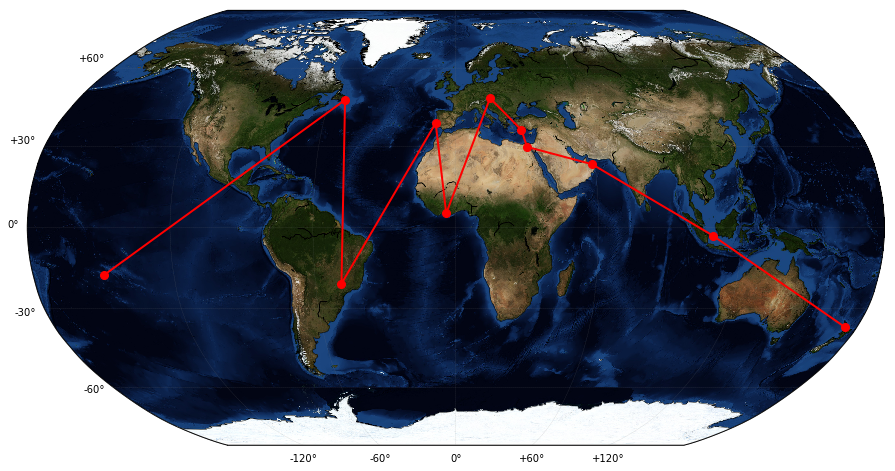

In [28]:
map_ = plot_map(lon, lat)
plt.show()

In [29]:
df_sampled

,continent,country,attraction,topicDistribution,latitude,longitude
37,oceania,French_Polynesia,Lagoonarium-Moorea_Society_Islands,"[0.000912516545198, 0.120722371993, 0.00097977...",-17.550666,-149.775447
904,na,Canada,Signal_Hill-St_John_s_Newfoundland_Newfoundlan...,"[0.228532734714, 0.0285021111601, 0.0260143957...",47.571275,-52.686949
800,sa,Brazil,Thermas_dos_Laranjais-Olimpia_State_of_Sao_Paulo,"[0.0141763195901, 0.0463651436594, 0.012813324...",-20.720875,-48.916530
1638,europe,Portugal,Lisbon_Oceanarium-Lisbon_Lisbon_District_Centr...,"[0.000738991570317, 0.761847630102, 0.00138418...",38.763543,-9.093742
503,africa,Cote_d_Ivoire,The_Plateau-Abidjan_Lagunes_Region,"[0.0239817690565, 0.0121115443923, 0.016341426...",5.359952,-4.008256
1239,europe,Austria,Musikverein-Vienna,"[0.0152763336728, 0.00094873658311, 0.00637281...",48.200705,16.372820
1842,europe,Turkey,Palm_Beach_Club-Kalkan_Turkish_Mediterranean_C...,"[0.00225575056707, 0.0159751073048, 0.00765390...",36.251202,29.429540
519,africa,Egypt,Pyramids_of_Giza-Giza_Giza_Governorate,"[0.000762015162907, 0.00662449984094, 0.003459...",30.000153,31.176505
347,asia,Oman,Bait_Al_Zubair-Muscat_Muscat_Governorate,"[0.0461033772365, 0.00137637670141, 0.00080591...",23.589208,58.599850
187,asia,Indonesia,Lengkuas_Island-Belitung_Island_Bangka_Belitun...,"[0.00579846983415, 0.0120915510924, 0.00301350...",-2.870894,107.953184
